In [1]:
# モジュール・ライブラリのインポート（必ず最初に実行）
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import optimize

# 日本語フォントの設定（Mac:'Hiragino Sans', Windows:'MS Gothic'）
plt.rcParams['font.family'] = 'Hiragino Sans'

# 表記の設定
pd.set_option('display.precision', 3)   # 小数点以下の表示桁
pd.set_option('display.max_rows', 20)  # 表示する行数
pd.set_option('display.max_columns', 10)  # 表示する行数
%precision 3

'%.3f'

# 散布図・相関分析による問題解決

## 単回帰モデル

量的データ $ X, Y $ が与えられたとき，変数 $ X $ の値から $ Y $ の値を予測するための数式のことを**回帰モデル**と呼ぶ．
また，$ X $ を**説明変数**（独立変数），$ Y $ を**目的変数**（従属変数，被説明変数）と呼ぶ．

回帰モデルには様々な種類が存在するが，以下の散布図のように変数 $ X,\ Y $ の間に直線関係が成り立ちそうな場合には，回帰モデルとして1次関数

$$
	\hat{y} = ax + b
$$(eq:regression_line)

を用いるのが妥当である．
このように１次関数による回帰モデルは**単回帰モデル**と呼ばれ，式{eq}`eq:regression_line`の直線のことは**回帰直線**と呼ばれる．
また，$ a,\ b $ は回帰直線の切片と傾きを表すパラメータであり，**回帰係数**と呼ばれる．

In [9]:
# データの作成
np.random.seed(1234)
x_data = np.linspace(-10, 10, num=100)
y_data = 2*x_data + 5 + 5.*np.random.randn(x_data.size)
np.savetxt('./data_lsm.csv', np.c_[x_data, y_data], fmt='%.2f', delimiter=',')

Text(0, 0.5, '$Y$')

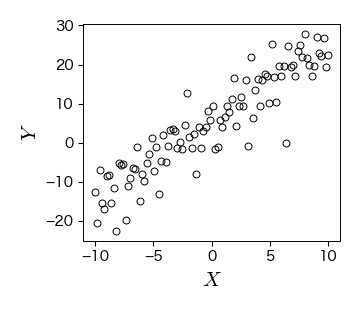

In [10]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data, 'ko', mfc='None')
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)

## 最小二乗法

１つの説明変数と目的変数から成る $ n $ 組のデータ $ (x_{1}, y_{1}), \ldots, (x_{n}, y_{n}) $ が与えられたとき，単回帰モデル{eq}`eq:regression_line`を用いてデータから最適な回帰直線を求めることを**単回帰分析**と呼ぶ（説明変数が複数ある場合は重回帰分析と呼ぶ）．
単回帰分析には様々な方法があるが，最も基本的な方法が**最小二乗法**である．

最小二乗法では，予測値 $ \hat{y}_{i}=ax_{i}+b $ と実データ $ y_{i} $ の差の二乗和

$$
	E(a, b) = \sum_{i=1}^{n}(ax_{i}+b-y_{i})^{2}
$$(eq:rss)

が最小となるように回帰係数 $ a,\ b $ を選ぶ．
このとき，$ E $ のことを**残差変動**（残差平方和）と呼ぶ．
残差変動 $ E $ を最小にすることは，$ a,\ b $ を変数とする２次関数 $ E(a, b) $ の最小値を求めることと言い換えられる．
このための必要条件は，残差変動 $ E(a, b) $ の $ a,\ b $ による偏微分がゼロになることである：

$$
	\frac{\partial E}{\partial a} = 0, \hspace{0.5cm} \frac{\partial E}{\partial b} = 0
$$

実際にこれらの条件を適用すると，$ a,\ b $ を変数とする以下の連立方程式が得られる：

\begin{align*}
	\sum_{i=1}^{n} (ax_{i}+b-y_{i})x_{i} &= 0 \\
	\sum_{i=1}^{n} (ax_{i}+b-y_{i}) &= 0
\end{align*}

この連立方程式を解くと，$ a,\ b $ は

\begin{align*}
	a &=\frac{\displaystyle\left(\frac{1}{n}\sum_{i=1}^{n} x_{i}y_{i}\right) - \left(\frac{1}{n} \sum_{i=1}^{n}x_{i}\right)\left(\frac{1}{n}\sum_{i=1}^{n}y_{i}\right)}{\displaystyle \left(\frac{1}{n}\sum_{i=1}^{n} x_{i}^{2}\right) -  \left(\frac{1}{n}\sum_{i=1}^{n}x_{i}\right)^{2}}
	   = \frac{\overline{xy}-\bar{x}\bar{y}}{\overline{x^2}-\bar{x}^2} = \frac{s_{XY}}{s_{X}^2} \\[10pt]
	b &= \left(\frac{1}{n} \sum_{i=1}^{n}y_{i}\right) - a\left(\frac{1}{n} \sum_{i=1}^{n}x_{i}\right) = \bar{y} - a \bar{x}
\end{align*}

と求まる．

なお，傾き $ a $ は $X, Y$ の共分散 $ s_{XY} $ を $ X $ の分散 $ s^{2}_{X} $ で割った形になっている（相関係数の式に似ているが違う）．
よって，以下が成り立つ：

- $ s_{XY}>0\quad \Longleftrightarrow\quad a > 0 $　（正の相関）
- $ s_{XY}=0\quad \Longleftrightarrow\quad a = 0 $　（無相関）
- $ s_{XY}<0\quad \Longleftrightarrow\quad a < 0 $　（負の相関）

**pythonによる実装**

In [11]:
# scipy.optimize.curve_fit
def fit_func(x, a, b):
    return a*x + b

p = optimize.curve_fit(fit_func, x_data, y_data)[0]
print(p)

[1.983 5.176]


In [12]:
# 公式から
nume = np.mean(x_data * y_data) - np.mean(x_data) * np.mean(y_data)
denom = np.mean(x_data**2) - np.mean(x_data)**2
a = nume / denom
b = np.mean(y_data - a*x_data)
(a, b)

(1.983, 5.176)

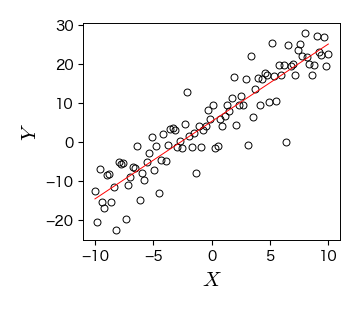

In [13]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data, 'ko', mfc='None')
ax.plot(x_data, fit_func(x_data, p[0], p[1]), 'r-', mfc='None')
ax.set_xlabel('$X$', fontsize=15)
ax.set_ylabel('$Y$', fontsize=15)
fig.savefig('./lsm_ex.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

## 決定係数

$ n $ 組のデータ $ (x_{1}, y_{1}), \ldots (x_{n}, y_{n}) $ に対して，データ $ Y $ のばらつきを

$$
  S_{y}^{2} = \sum_{i=1}^{n} (y_{i} - \bar{y})^{2}
$$

と定義する．
これを**全変動**と呼ぶ．
また，実データと予測値のズレは残差変動{eq}`eq:rss`によって表される．
ここでは，残差変動を

$$
  \displaystyle S_{e}^{2} = \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}
$$

と表す．

このとき，回帰直線のデータへの当てはまりの良さを

$$
	R^{2} = 1 - \frac{S_{e}^{2}}{S_{y}^{2}}
$$(eq:R2)

で定義する．
これを**決定係数**と呼ぶ（他の定義もあるので注意）．

最小二乗法による線形単回帰分析の場合，決定係数は $ X,\ Y $ の相関係数の２乗に等しく，その定義域は $ 0 \leq R^{2} \leq 1 $ である．
よって，以下が成り立つ
- 残差変動 $ S_{e}^{2} $ が小さくなると $ R^{2} $ は $ 1 $ に近づく（データへの当てはまりが良い）
- 残差変動 $ S_{e}^{2} $ が大きくなると $ R^{2} $ は $ 0 $ に近づく（データへの当てはまりが悪い）

※ 予測値 $ \hat{y} $ が最小二乗法以外の方法によって決められた場合，決定係数が負になることもあり，さらに相関係数の２乗にはならない．

**pythonによる実装**

In [9]:
# 決定係数
y_reg = fit_func(x_data, p[0], p[1])
R2 = 1-np.var(y_data - y_reg) / np.var(y_data)
R2

0.844

In [20]:
# 相関係数の２乗
r_xy = pd.DataFrame(np.c_[x_data, y_data]).corr()[0][1]
r_xy**2

0.844

## 実例：都市の平均気温と緯度の関係

### STEP1: Problem
- 地球上では，赤道付近は暑く，極地に近づくほど寒くなる．
- 世界の様々な地域の年間平均気温はどのように決まっているのだろうか？

### STEP2: Plan
- 世界の各地域で年間平均気温は異なっている．
- 各地域での年間平均気温に影響を与える要因は，各地域の地球上での位置，都市の自然環境，人間活動などが考えられ，これらは{numref}`fig:fishbone`のようにまとめることができる（これを**特性要因図**と呼ぶ）．
- 以下では，各都市の地球上での緯度と標高に着目し，年間平均気温との関係を探る．

```{figure} fishbone.png
---
height: 200px
name: fig:fishbone
---
特性要因図
```

### STEP3: Data

- ここでは，理科年表から取得した世界25都市のデータ（[data_25city.csv](https://drive.google.com/uc?export=download&id=1eBbmZSCgVKF61s85kGyrofrLApdO-95J)）を用いる．
- まずはダウンロードしたcsvファイルをpandasのDataFrameに読み込む．
  - T列は年間平均気温，L列は緯度，Z列は標高を表している．

In [2]:
D = pd.read_csv('./data_25city.csv')
D

,name,T,L,Z,group
0,昭和基地,-10.5,-69.00,18,5
1,メルボルン,14.5,-37.39,132,4
2,ブエノスアイレス,17.8,-34.35,25,3
3,ブリスベン,20.3,-27.23,4,3
4,リオデジャネイロ,23.9,-22.55,5,2
...,...,...,...,...,...
20,リオン,11.9,45.43,197,4
21,チューリッヒ,9.4,47.22,555,5
22,プラハ,8.4,50.06,380,5
23,ダブリン,9.8,53.26,68,5


### STEP4: Analysis

#### 平均気温と標高の散布図
- 各都市の年間平均気温 $ T $ と標高 $ Z $ の関係を視覚的に調べるため，散布図を作成する．
- 以下の散布図には特定の関数関係はないため，年間平均気温と標高はそれほど関係ないと考えられる．
- ただし，ボコダ，メキシコ，アジスアベバの3都市は標高が2000m以上であり，外れ値となっている．

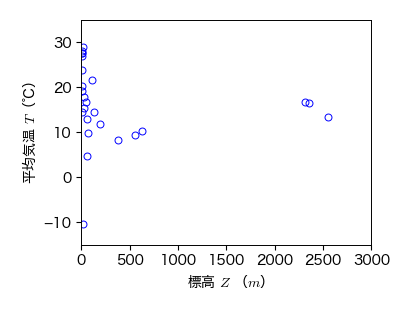

In [3]:
# 標高と平均気温の散布図
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(D['Z'], D['T'], 'bo', mfc='None')
ax.set_xlim(0, 3000); ax.set_ylim(-15, 35)
ax.set_xlabel('標高 $Z$ （$m$）')
ax.set_ylabel('平均気温 $T$（℃）')
fig.savefig('./alt_temp.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

In [5]:
# 標高2000m以上の都市を抽出
D.loc[D['Z'] > 2000]

,name,T,L,Z,group
8,ボゴダ,13.4,4.42,2547,1
10,アジスアベベ,16.6,9.02,2354,1
12,メキシコ,16.7,19.24,2309,2


#### 平均気温と緯度の散布図
- 同様に，年間平均気温 $ T $ と緯度 $ L $ の散布図を調べる．
- 散布図より，年間平均気温と緯度には何らかの相関関係がありそうだが，平均気温は緯度に対して上に凸の2次関数のような関係となり，かつ赤道（0度）に対して左右対称になっている．
- このように，散布図がそもそも直線関係となっていない場合には，相関係数を求めるのは不適切である．

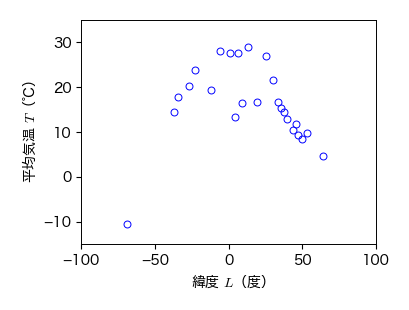

In [6]:
# 緯度と平均気温の散布図
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(D['L'], D['T'], 'bo', mfc='None')
ax.set_xlim(-100, 100); ax.set_ylim(-15, 35)
ax.set_xlabel('緯度 $L$（度）')
ax.set_ylabel('平均気温 $T$（℃）')
fig.savefig('./lat_temp.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

#### 平均気温と緯度の関数関係

- 年間平均気温 $ T $ と緯度 $ L $の関数関係を特定すれば，散布図が直線関係を示すような適切な変数変換を導ける．
- 年間平均気温と緯度の散布図から，平均気温は緯度に対して上に凸の２次関数となっている．
- そこで，横軸に緯度の２乗 $L^2$，縦軸に年間平均気温 $ T $ を取った散布図を描けば，直線関係が得られそうである．

**実習**
- 横軸に緯度の２乗 $ L^2 $，縦軸に年間平均気温 $ T $ を取った散布図を描け
- この散布図に対して，最小二乗法で回帰直線を求めよ
- この散布図に対して，相関係数を求めよ

[-6.108e-03  2.410e+01]


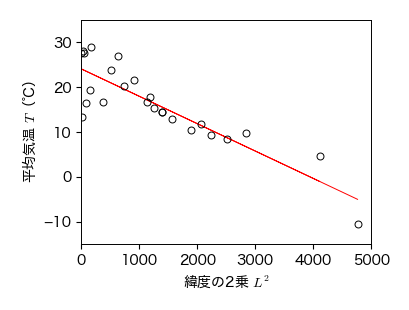

In [15]:
''' 平均気温と緯度の２乗の散布図 '''
def fit_func(x, a, b):
    return a*x + b

fig, ax = plt.subplots(figsize=(4, 3))

# 最小二乗法による回帰直線
p = optimize.curve_fit(fit_func, D['L']**2, D['T'])[0]
print(p)
ax.plot(D['L']**2, fit_func(D['L']**2, p[0], p[1]), 'r-')

# 散布図
ax.plot(D['L']**2, D['T'], 'ko', mfc='None')
ax.set_xlim(0, 5000); ax.set_ylim(-15, 35)
ax.set_xlabel('緯度の2乗 $L^2$')
ax.set_ylabel('平均気温 $T$（℃）')
fig.savefig('./lat2_temp.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

In [41]:
# 緯度の2乗と平均気温の相関係数
np.corrcoef(D['L']**2, D['T'])

array([[ 1.   , -0.877],
       [-0.877,  1.   ]])

### STEP5: Conclusion
- 各都市の年間平均気温と緯度の関係を散布図によって調べた結果，緯度の２乗に対して直線関係があることが分かった．
- これより，年間平均気温 $ T $ と緯度 $ L $ の関数関係は以下のように推定できる：
  $$
    T = -0.0061L^2 + 24.1
  $$

- 一方，年間平均気温が緯度の2次関数になるということは緯度が高くなるほど平均気温がいくらでも大きくなることを意味し，やや奇妙でもある．
- また，直線関係から外れる都市がいくつか存在するのも気になる点である．

**発展的な実習1：より適切な関数**
- 緯度 $ L $ における太陽エネルギーは $ \cos L $ に比例することが知られている．そこで，横軸に $ \cos(L) $， 縦軸に年間平均気温 $ T $ を取った散布図を作成せよ
- 作成した散布図より，緯度 $ L $ と年間平均気温 $ T $ を結びつける，より適切な関数を求めよ
- $ \cos $ のテイラー展開の観点から，2次関数の妥当性を議論せよ

[ 44.315 -19.923]


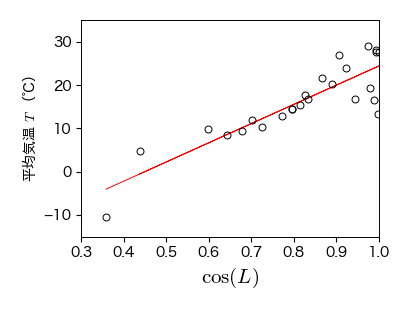

In [16]:
''' 平均気温とcos(緯度)の散布図 '''

fig, ax = plt.subplots(figsize=(4, 3))

# 最小二乗法による回帰直線
p = optimize.curve_fit(fit_func, np.cos(np.radians(D['L'])), D['T'])[0]
print(p)
ax.plot(np.cos(np.radians(D['L'])), fit_func(np.cos(np.radians(D['L'])), p[0], p[1]), 'r-')

# 散布図
ax.plot(np.cos(np.radians(D['L'])), D['T'], 'ko', mfc='None')
ax.set_xlim(0.3, 1); ax.set_ylim(-15, 35)
ax.set_xlabel('$\cos(L)$', fontsize=15)
ax.set_ylabel('平均気温 $T$ （℃）')
fig.savefig('./cos_lat_temp.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

In [17]:
# cos(緯度)と平均気温の相関係数
np.corrcoef(np.cos(np.radians(D['L'])), D['T'])

array([[1.   , 0.874],
       [0.874, 1.   ]])

**発展的な実習2：標高の調整**
- 一般に，標高が100m高くなると，気温は0.6℃低くなると言われている．そこで，高度調整済平均気温（標高0mでの平均気温）を $ T_{0}=T+0.006Z  $ によって求めよ
- $\cos(L)$ と高度調整済み平均気温 $ T_{0} $ の散布図を描け
- この散布図から相関係数を求めよ
- この散布図に対して回帰直線を引き，直線の式を求めよ

In [18]:
# 高度調整済み平均気温の計算
D['T0'] = D['T'] + 0.006 * D['Z']

[ 51.693 -23.651]


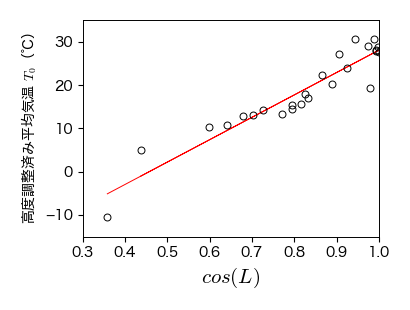

In [19]:
''' 高度調整済み平均気温とcos(緯度)の散布図 '''
fig, ax = plt.subplots(figsize=(4, 3))

# 最小二乗法による回帰直線
p = optimize.curve_fit(fit_func, np.cos(np.radians(D['L'])), D['T0'])[0]
print(p)
ax.plot(np.cos(np.radians(D['L'])), fit_func(np.cos(np.radians(D['L'])), p[0], p[1]), 'r-')

# 散布図
ax.plot(np.cos(np.radians(D['L'])), D['T0'], 'ko', mfc='None')
ax.set_xlim(0.3, 1); ax.set_ylim(-15, 35)
ax.set_xlabel('$cos(L)$', fontsize=15)
ax.set_ylabel('高度調整済み平均気温 $T_{0}$（℃）')
fig.savefig('./cos_lat_temp2.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

In [20]:
# 相関係数
np.corrcoef(np.cos(np.radians(D['L'])), D['T0'])

array([[1.   , 0.944],
       [0.944, 1.   ]])